# Titanic Predition

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Import Packages

In [4]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [6]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [6]:
import sys 
!conda install --yes --prefix {sys.prefix} pandas-profiling
import pandas_profiling as pp

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\davaleswarapu.kumar\Anaconda3

  added / updated specs:
    - pandas-profiling


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         125 KB
    certifi-2019.11.28         |           py37_0         154 KB
    conda-4.8.3                |           py37_0         2.8 MB
    openssl-1.1.1d             |       he774522_4         4.8 MB
    pandas-profiling-1.4.1     |           py37_0          39 KB
    ------------------------------------------------------------
                                           Total:         8.0 MB

The following NEW packages will be INSTALLED:

  pandas-profiling   pkgs/main/win-64::pandas-profiling-1.4.1-py37_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                  

# Data Collection

In [7]:
os.chdir(r"D:/folder_project/titanic")

In [21]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [22]:
print(train.shape)
train1=train

(891, 12)


In [12]:
train.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
print(train.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object


In [21]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [22]:
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [23]:
train.values

array([[1, 3, 'Braund, Mr. Owen Harris', ..., nan, 'S', 0],
       [2, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', ...,
        'C85', 'C', 1],
       [3, 3, 'Heikkinen, Miss. Laina', ..., nan, 'S', 1],
       ...,
       [889, 3, 'Johnston, Miss. Catherine Helen "Carrie"', ..., nan,
        'S', 0],
       [890, 1, 'Behr, Mr. Karl Howell', ..., 'C148', 'C', 1],
       [891, 3, 'Dooley, Mr. Patrick', ..., nan, 'Q', 0]], dtype=object)

# Clean Data

In [88]:
#Check the different kinds available
sum(train["Sex"].value_counts())

891

In [87]:
sum(train["Pclass"].value_counts())

891

In [85]:
sum(train["Embarked"].value_counts())

889

In [86]:
sum(train["Survived"].value_counts())

891

In [23]:
#update the column sex
gender={"male":1,"female":2}
train.Sex= [gender[x] for x in train.Sex]

In [45]:
train.Sex.dtypes

dtype('int64')

In [24]:
#dropping un useful columns
train.drop(["Name","Ticket","Embarked","Cabin"],axis=1, inplace=True)

In [91]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0


In [10]:
index1=train.index
column1=train.columns

In [59]:
column1

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [81]:
for i in column1:
    df=train.loc[:,i]
    print(sum(n < 0 for n in df))

0
0
0
0
0
0
0


TypeError: '<' not supported between instances of 'str' and 'int'

In [98]:
#Which rows contain NaN values?
train.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Survived       False
dtype: bool

# Handling Missing Values

In [25]:
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,2,38.0,1,0,71.2833,1
2,3,3,2,26.0,0,0,7.9250,1
3,4,1,2,35.0,1,0,53.1000,1
4,5,3,1,35.0,0,0,8.0500,0


# Outlier Analysis

In [41]:
from scipy.stats import itemfreq
type_1 = itemfreq(train.loc[:,"Pclass"])
print(type_1)
df=pd.DataFrame(type_1)
df

[[  1 216]
 [  2 184]
 [  3 491]]


,0,1
0,1,216
1,2,184
2,3,491


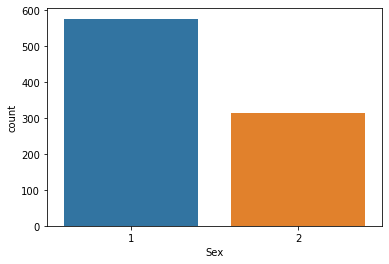

In [44]:
sns.countplot(x ='Sex', data = train) 


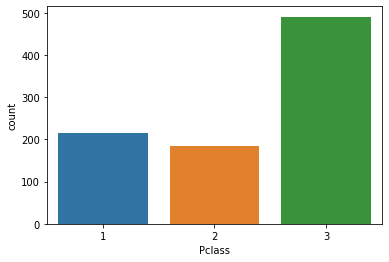

In [45]:
sns.countplot(x ='Pclass', data = train) 


0    549
1    342
Name: Survived, dtype: int64


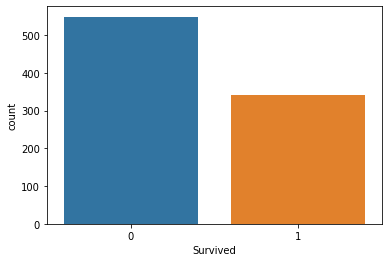

In [49]:
print(train["Survived"].value_counts())
sns.countplot(x ='Survived', data = train)

Here we can clearly, visulaize that number of survived people are very less compared to people who died.

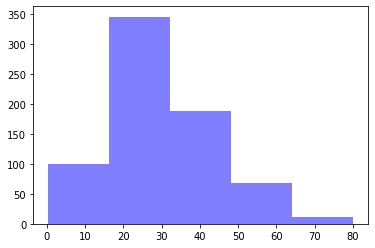

In [51]:
x = train.Age
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

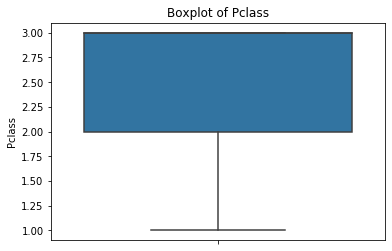

In [58]:
sns.boxplot(y=train["Pclass"])
plt.title("Boxplot of Pclass")
plt.show()

In [89]:
# Print the larget 3 values in Age
print(train["Fare"].nsmallest(20).values)

[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     4.0125 5.     6.2375 6.4375 6.45  ]


In [81]:
five_number_summary = train.Age.describe()
five_number_summary

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [82]:
IQR = five_number_summary["75%"] - five_number_summary["25%"]
upper_limit = (1.5 * IQR) + five_number_summary["75%"]
lower_limit = five_number_summary["25%"] - (1.5 * IQR)
print("IQR:",IQR)
print("1.5 * IQR:", (1.5 * IQR))
print("upper_limit:",upper_limit)# upper whisker is drawn at --
print("lower_limit:",lower_limit)# lower whisker is drawn at --

IQR: 17.875
1.5 * IQR: 26.8125
upper_limit: 64.8125
lower_limit: -6.6875


In [87]:
Age_outlier = ((train.Age < (lower_limit - 1.5 * IQR)) |(train.Age > (upper_limit + 1.5 * IQR)))

Series([], Name: Age, dtype: float64)

In [59]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train))
print(z)

[[1.73010796 0.82737724 0.73769513 ... 0.47367361 0.50244517 0.78927234]
 [1.72622007 1.56610693 1.35557354 ... 0.47367361 0.78684529 1.2669898 ]
 [1.72233219 0.82737724 1.35557354 ... 0.47367361 0.48885426 1.2669898 ]
 ...
 [1.72233219 0.82737724 1.35557354 ... 2.00893337 0.17626324 0.78927234]
 [1.72622007 1.56610693 0.73769513 ... 0.47367361 0.04438104 1.2669898 ]
 [1.73010796 0.82737724 0.73769513 ... 0.47367361 0.49237783 0.78927234]]


In [60]:
threshold = 3
print(np.where(z > 3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88, 118, 119, 159,
       164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278, 299, 311,
       324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 527, 541, 542,
       557, 567, 610, 638, 678, 679, 683, 686, 689, 700, 716, 730, 736,
       737, 742, 774, 779, 787, 792, 813, 824, 846, 850, 858, 863, 885],
      dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4, 6, 4,
       4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 6, 4, 4, 6, 5, 5, 5, 5,
       6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 5, 6, 4, 4, 4, 4, 4, 4, 5, 4, 5],
      dtype=int64))


In [61]:
threshold = 3
print(np.where(z < -3))

(array([], dtype=int64), array([], dtype=int64))


In [62]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PassengerId    445.0000
Pclass           1.0000
Sex              1.0000
Age             17.8750
SibSp            1.0000
Parch            0.0000
Fare            23.0896
Survived         1.0000
dtype: float64


# Z-Score

In [80]:
train=train2

In [71]:
train = train[(z > 3).all(axis=1)]

In [72]:
train.shape

(0, 8)

In [73]:
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived


In [91]:
train3 = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train3.shape

(416, 8)

In [94]:
train.shape

(891, 8)

In [78]:
percent=(891-598)/891
print(percent)

0.3288439955106622


# Imputing with median value


In [150]:
df = train.loc[:,["Age"]]
df.loc[df.isna().sum()].index.tolist()
len(df.loc[df.isna().sum(1)>=1].index.tolist())

0

In [114]:
df.loc[df.isna().sum(1)>=1]

,Age
5,NaN
17,NaN
19,NaN
26,NaN
28,NaN
...,...
859,NaN
863,NaN
868,NaN
878,NaN


In [131]:
#Check the median value. By default, NaN is skipped.
value=train["Age"]
type(value)

pandas.core.series.Series

In [124]:
value

Age    28.0
dtype: float64

In [125]:
type(value)

pandas.core.series.Series

In [126]:
value[0]

28.0

In [149]:
from sklearn.impute import SimpleImputer
average_dine_in_per_month_array = np.array(train["Age"])
imputer = SimpleImputer(strategy = "median")
train["Age"]=imputer.fit_transform(average_dine_in_per_month_array.reshape(-1,1))

In [143]:
z = np.array([[1, 2, 3, 4],
         [5, 6, 7, 8],
         [9, 10, 11, 12]])
type(z)

numpy.ndarray

In [145]:
np.array(z)

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [158]:
average_dine_in_per_month_array = np.array(train_dup["Embarked"])
imputer = SimpleImputer(strategy = 'most_frequent')
train_dup["Embarked"]=imputer.fit_transform(average_dine_in_per_month_array.reshape(-1,1))

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
196,197,3,1,NaN,0,0,7.7500,0
197,198,3,1,42.0,0,1,8.4042,0
198,199,3,2,NaN,0,0,7.7500,1
199,200,2,2,24.0,0,0,13.0000,0
200,201,3,1,28.0,0,0,9.5000,0


In [154]:
train_dup=pd.read_csv('train.csv')

In [155]:
train_dup.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [159]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [160]:
train.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Survived       0
dtype: int64

In [161]:
test_data=test.drop(columns=['Cabin','Name','Ticket']) 

In [162]:
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,2,38.0,1,0,71.2833,1
2,3,3,2,26.0,0,0,7.9250,1
3,4,1,2,35.0,1,0,53.1000,1
4,5,3,1,35.0,0,0,8.0500,0


In [163]:
train.set_index('PassengerId',inplace=True)
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,0
2,1,2,38.0,1,0,71.2833,1
3,3,2,26.0,0,0,7.9250,1
4,1,2,35.0,1,0,53.1000,1
5,3,1,35.0,0,0,8.0500,0


In [164]:
test_data.set_index('PassengerId',inplace=True)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [167]:
train_data=train.drop(columns=['Fare'])
test_data=test_data.drop(columns=['Fare'])

In [171]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [170]:
average_dine_in_per_month_array = np.array(test_data["Age"])
imputer = SimpleImputer(strategy = "median")
test_data["Age"]=imputer.fit_transform(average_dine_in_per_month_array.reshape(-1,1))

# Normalizing Age

z = np.abs(stats.zscore(train_data["Age"]))
train_data["Age"]=z

In [174]:
train_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Survived
PassengerId,,,,,,
1,3,1,0.565736,1,0,0
2,1,2,0.663861,1,0,1
3,3,2,0.258337,0,0,1


In [175]:
z = np.abs(stats.zscore(test_data["Age"]))
test_data["Age"]=z

# NOrmalizing SibSp column and Parch Column

In [179]:
temp=["SibSp","Parch"]
for i in temp:
    z = np.abs(stats.zscore(test_data[i]))
    z1= np.abs(stats.zscore(train_data[i]))
    train_data[i]=z1
    test_data[i]=z

In [180]:
train_data.head(5)

,Pclass,Sex,Age,SibSp,Parch,Survived
PassengerId,,,,,,
1,3,1,0.565736,0.432793,0.473674,0
2,1,2,0.663861,0.432793,0.473674,1
3,3,2,0.258337,0.474545,0.473674,1
4,1,2,0.433312,0.432793,0.473674,1
5,3,1,0.433312,0.474545,0.473674,0


In [181]:
train_data1=pd.get_dummies(train_data)
test_data1=pd.get_dummies(test_data)

In [182]:
train_data1.head()

,Pclass,Sex,Age,SibSp,Parch,Survived
PassengerId,,,,,,
1,3,1,0.565736,0.432793,0.473674,0
2,1,2,0.663861,0.432793,0.473674,1
3,3,2,0.258337,0.474545,0.473674,1
4,1,2,0.433312,0.432793,0.473674,1
5,3,1,0.433312,0.474545,0.473674,0


In [183]:
features=train_data.columns.drop("Survived")
train_encoded=pd.get_dummies(train[features])
train_encoded["Survived"]=train["Survived"]

In [187]:
test_data.head(5)

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
892,3,male,0.386231,0.499470,0.400248,Q
893,3,female,1.371370,0.616992,0.400248,S
894,2,male,2.553537,0.499470,0.400248,Q
895,3,male,0.204852,0.499470,0.400248,S
896,3,female,0.598908,0.616992,0.619896,S


In [188]:
test_encoded=pd.get_dummies(test_data[features])

In [189]:
test_encoded.head(5)

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
PassengerId,,,,,,
892,3,0.386231,0.499470,0.400248,0,1
893,3,1.371370,0.616992,0.400248,1,0
894,2,2.553537,0.499470,0.400248,0,1
895,3,0.204852,0.499470,0.400248,0,1
896,3,0.598908,0.616992,0.619896,1,0


In [190]:
type(test_data)

pandas.core.series.Series

In [191]:
df = pd.DataFrame({'Pclass': ['1', '2','3']})

In [192]:
df

,Pclass
0,1
1,2
2,3


In [194]:
test_encoded_1 = pd.concat([test_encoded,pd.get_dummies(test_encoded['Pclass'], prefix='Pclass')],axis=1)

In [196]:
test_encoded_1.head(5)

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,
892,3,0.386231,0.499470,0.400248,0,1,0,0,1
893,3,1.371370,0.616992,0.400248,1,0,0,0,1
894,2,2.553537,0.499470,0.400248,0,1,0,1,0
895,3,0.204852,0.499470,0.400248,0,1,0,0,1
896,3,0.598908,0.616992,0.619896,1,0,0,0,1


In [197]:
train_encoded.head(5)

,Pclass,Sex,Age,SibSp,Parch,Survived
PassengerId,,,,,,
1,3,1,22.0,1,0,0
2,1,2,38.0,1,0,1
3,3,2,26.0,0,0,1
4,1,2,35.0,1,0,1
5,3,1,35.0,0,0,0


In [198]:
train_encoded_1 = pd.concat([train_encoded,pd.get_dummies(train_encoded['Pclass'], prefix='Pclass')],axis=1)
train_encoded_1 = pd.concat([train_encoded_1,pd.get_dummies(train_encoded_1['Sex'], prefix='Sex')],axis=1)

In [200]:
train_encoded_1.head(5)
tmp=train_encoded_1.columns.drop("Pclass","Sex")
train_encoded_1=train_encoded_1[tmp]


In [202]:
train_encoded_1.head(5)

,Sex,Age,SibSp,Parch,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2
PassengerId,,,,,,,,,,
1,1,22.0,1,0,0,0,0,1,1,0
2,2,38.0,1,0,1,1,0,0,0,1
3,2,26.0,0,0,1,0,0,1,0,1
4,2,35.0,1,0,1,1,0,0,0,1
5,1,35.0,0,0,0,0,0,1,1,0


In [203]:
tmp=test_encoded_1.columns.drop("Pclass","Sex")
test_encoded_1=test_encoded_1[tmp]

In [207]:
test_encoded_1.head(5)

,Age,SibSp,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,
892,0.386231,0.499470,0.400248,0,1,0,0,1
893,1.371370,0.616992,0.400248,1,0,0,0,1
894,2.553537,0.499470,0.400248,0,1,0,1,0
895,0.204852,0.499470,0.400248,0,1,0,0,1
896,0.598908,0.616992,0.619896,1,0,0,0,1


In [209]:
train_encoded_1.rename(columns={"Sex_1" : "Sex_male","Sex_2":"Sex_female"})

,Sex,Age,SibSp,Parch,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_male,Sex_female
PassengerId,,,,,,,,,,
1,1,22.0,1,0,0,0,0,1,1,0
2,2,38.0,1,0,1,1,0,0,0,1
3,2,26.0,0,0,1,0,0,1,0,1
4,2,35.0,1,0,1,1,0,0,0,1
5,1,35.0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
887,1,27.0,0,0,0,0,1,0,1,0
888,2,19.0,0,0,1,1,0,0,0,1
889,2,28.0,1,2,0,0,0,1,0,1


In [210]:
tmp=train_encoded_1.columns.drop("Sex")
train_encoded_1=train_encoded_1[tmp]

In [211]:
train_encoded_1.head(5)

,Age,SibSp,Parch,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2
PassengerId,,,,,,,,,
1,22.0,1,0,0,0,0,1,1,0
2,38.0,1,0,1,1,0,0,0,1
3,26.0,0,0,1,0,0,1,0,1
4,35.0,1,0,1,1,0,0,0,1
5,35.0,0,0,0,0,0,1,1,0


In [212]:
train_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Survived
PassengerId,,,,,,
1,3,1,0.565736,0.432793,0.473674,0
2,1,2,0.663861,0.432793,0.473674,1
3,3,2,0.258337,0.474545,0.473674,1


In [213]:
train_encoded_1["Age"]=train_data["Age"]
train_encoded_1["SibSp"]=train_data["SibSp"]
train_encoded_1["Parch"]=train_data["Parch"]

In [214]:
train_encoded_1.head(5)

,Age,SibSp,Parch,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2
PassengerId,,,,,,,,,
1,0.565736,0.432793,0.473674,0,0,0,1,1,0
2,0.663861,0.432793,0.473674,1,1,0,0,0,1
3,0.258337,0.474545,0.473674,1,0,0,1,0,1
4,0.433312,0.432793,0.473674,1,1,0,0,0,1
5,0.433312,0.474545,0.473674,0,0,0,1,1,0


In [216]:
test_encoded_1.head(5)

,Age,SibSp,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,
892,0.386231,0.499470,0.400248,0,1,0,0,1
893,1.371370,0.616992,0.400248,1,0,0,0,1
894,2.553537,0.499470,0.400248,0,1,0,1,0
895,0.204852,0.499470,0.400248,0,1,0,0,1
896,0.598908,0.616992,0.619896,1,0,0,0,1


In [217]:
train1=train_encoded_1
test1=test_encoded_1

In [218]:
train1.shape

(891, 9)

In [219]:
test1.shape

(418, 8)

# Splitting the train data to validate model

In [220]:
from sklearn.model_selection import train_test_split
titanic_train, titanic_test = train_test_split(train1,test_size=0.15)
titanic_train.shape, titanic_test.shape

((757, 9), (134, 9))

In [222]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
features=titanic_train.columns.drop("Survived")
target=["Survived"]
model.fit(titanic_train[features],titanic_train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [224]:
from sklearn.tree import export_graphviz

In [228]:
train_accuracy=model.score(titanic_train[features],titanic_train[target])
train_accuracy

0.9194187582562747

In [229]:
test_accuracy=model.score(titanic_test[features],titanic_test[target])
test_accuracy

0.7761194029850746

In [231]:
from sklearn.model_selection import KFold

In [232]:
titanic_train, titanic_test = train_test_split(train1,test_size=0.15,random_state=100)
k_fold=KFold(n_splits=5,shuffle=False,random_state=100)

In [235]:
features=titanic_train.columns.drop("Survived")
target=["Survived"]

In [236]:
avg_train_accuracy=[]
avg_val_accuracy=[]
x=titanic_train[features]
y=titanic_train[target]

In [237]:
values=[5,10,20,30,40]
values1=[0.005,0.01,0.1,0.2]

In [239]:
for i in values:
    train_accuracy=[]
    val_accuracy=[]
    for j in values1:
        model=DecisionTreeClassifier(min_samples_split=i,min_impurity_decrease=j)
        model.fit(titanic_train[features],titanic_train[target])
        train_accuracy.append(model.score(titanic_train[features],titanic_train[target]))
        val_accuracy.append(model.score(titanic_test[features],titanic_test[target]))
    avg_train_accuracy.append(np.mean(train_accuracy))
    avg_val_accuracy.append(np.mean(val_accuracy))
            

In [243]:
performance=pd.DataFrame(np.array([values,avg_train_accuracy,avg_val_accuracy]).T,columns=["min_split","avg_train_accuracy","avg_val_accuracy"])

In [244]:
performance

,min_split,avg_train_accuracy,avg_val_accuracy
0,5.0,0.750661,0.733209
1,10.0,0.750661,0.733209
2,20.0,0.750661,0.733209
3,30.0,0.750661,0.733209
4,40.0,0.750661,0.733209


# Using Random Forest

In [245]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,min_samples_split=20,min_impurity_decrease=0.05)


In [246]:
model.fit(titanic_train[features],titanic_train[target])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.05, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [247]:
train_accuracy=model.score(titanic_train[features],titanic_train[target])
test_accuracy=model.score(titanic_test[features],titanic_test[target])
print(train_accuracy,test_accuracy)

0.7873183619550859 0.7835820895522388


In [248]:
y_pred=model.predict(test1)

In [253]:
predicted_y=pd.DataFrame({'PassengerId':test1.index,'Survived':y_pred})

In [254]:
predicted_y

,PassengerId,Survived
0,892,1
1,893,1
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,0
415,1307,1
416,1308,1


In [255]:
predicted_y.to_csv('submission.csv',index=False)